## Data science project



In [193]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap



In [194]:
data = pd.read_csv("data.csv")
print (data.head)


<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [196]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [197]:
data = data.drop(['Unnamed: 32', 'id'], axis=1)
data['diagnosis'] = [1 if each == "M" else 0 for each in data['diagnosis']]
y = data['diagnosis']
x_data = data.drop(['diagnosis'], axis=1)

In [198]:
print(y.unique())


[1 0]


In [199]:
print(y.value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


<Axes: xlabel='diagnosis', ylabel='Count'>

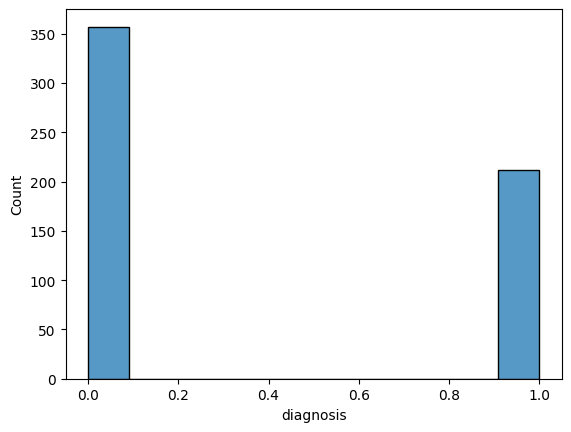

In [200]:
sns.histplot(data=y)

In [201]:

x_data.shape

(569, 30)

In [202]:
y = y.map({'M':1,'B':0})

<Axes: >

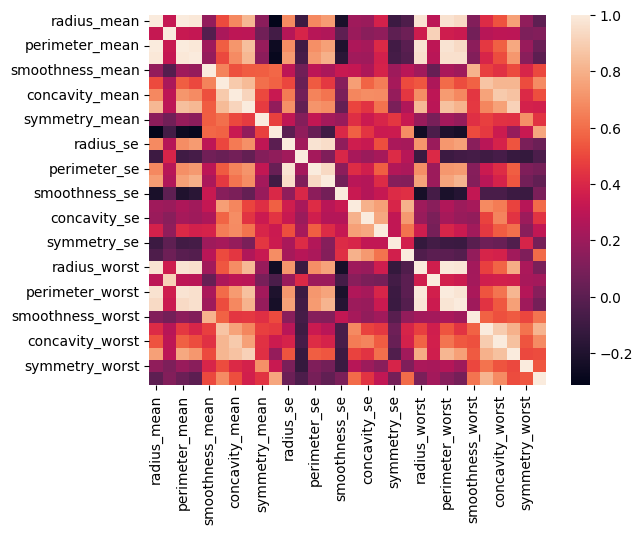

In [203]:
sns.heatmap(x_data.corr())

In [204]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [205]:
highly_corr = []
def high_corr(data,threshold):
    for i in range(len(data.corr().columns)):
        for j in range(i):
            if abs(data.corr().iloc[i,j]) > threshold:
                print(f'({data.corr().columns[i]},{data.corr().columns[j]}) : {data.corr().iloc[i,j]}')
                highly_corr.append((data.corr().columns[i],data.corr().columns[j]))

high_corr(x_data,0.95)

(perimeter_mean,radius_mean) : 0.9978552814938109
(area_mean,radius_mean) : 0.9873571700566127
(area_mean,perimeter_mean) : 0.9865068039913907
(perimeter_se,radius_se) : 0.9727936770160764
(area_se,radius_se) : 0.951830112110991
(radius_worst,radius_mean) : 0.9695389726112055
(radius_worst,perimeter_mean) : 0.9694763634663146
(radius_worst,area_mean) : 0.9627460860470841
(perimeter_worst,radius_mean) : 0.9651365139559871
(perimeter_worst,perimeter_mean) : 0.9703868870426394
(perimeter_worst,area_mean) : 0.9591195743552645
(perimeter_worst,radius_worst) : 0.993707916102949
(area_worst,area_mean) : 0.9592133256498998
(area_worst,radius_worst) : 0.9840145644590742
(area_worst,perimeter_worst) : 0.9775780914063871


In [206]:
x_data.shape

(569, 30)

In [207]:
x_data.drop(['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis=1,inplace=True)

In [208]:
x_data.shape

(569, 25)

In [209]:
x_data.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.405172,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.277313,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.111500,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.232400,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.324200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.478900,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,2.873000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [210]:

x_data = StandardScaler().fit_transform(x_data)

In [211]:
x_data_train, x_data_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)
x_data_train, x_data_val, y_train, y_val = train_test_split(x_data_train, y_train, test_size=0.3, random_state=42)

print(x_data_train.shape, x_data_val.shape, x_data_test.shape)

(318, 25) (137, 25) (114, 25)


In [212]:
###logistic regression 


In [213]:

# Train the logistic regression model
clf = LogisticRegression(random_state=0)
clf.fit(x_data_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_data_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot decision boundary
X_set, y_set = x_data_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.legend()
plt.title('Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Calculate model accuracy
accuracy = clf.score(x_data_test, y_test)
print("Model Accuracy:", accuracy)

ValueError: Input y contains NaN.